In [2]:
import numpy as np
import pandas as pd
from subprocess import check_output
%matplotlib inline

In [3]:
matches = pd.read_csv('matches.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 81.2+ KB


In [6]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [7]:
matches['winner'].fillna('Draw', inplace=True)

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [9]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)


In [10]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,RR,DD,RR,bat,normal,0,DD,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,MI,RCB,MI,bat,normal,0,RCB,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,DC,KKR,DC,bat,normal,0,KKR,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [11]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)

In [12]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,6,7,6,bat,normal,0,7,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,1,3,1,bat,normal,0,3,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,4,2,4,bat,normal,0,2,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [13]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
572,573,2016,Raipur,2016-05-22,7,3,3,field,normal,0,3,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
573,574,2016,Bangalore,2016-05-24,8,3,3,field,normal,0,3,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
574,575,2016,Delhi,2016-05-25,10,2,2,field,normal,0,10,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
575,576,2016,Delhi,2016-05-27,8,10,10,field,normal,0,10,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
576,577,2016,Bangalore,2016-05-29,10,3,10,bat,normal,0,10,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [14]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [15]:
matches['city'].fillna('Dubai',inplace=True)


In [16]:
matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,5.417678,5.481802,5.365685,0.025997,5.218371,13.715771,3.363951,NaN
std,166.709828,2.486247,3.281985,3.291946,3.255295,0.159263,3.196267,23.619282,3.416049,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,8.000000,7.000000,7.000000,0.000000,7.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,13.000000,13.000000,13.000000,1.000000,14.000000,144.000000,10.000000,NaN


In [17]:
df = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]


In [18]:
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,7,Delhi,bat,6,Feroz Shah Kotla,7
3,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,4,2,Kolkata,bat,4,Eden Gardens,2


In [19]:
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [34]:
discVal = encode['winner']
#print(discVal['MI'])
print(list(dicVal.keys())[list(dicVal.values()).index(2)])

KKR


In [35]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]


In [36]:
matches.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,7,Delhi,bat,6,Feroz Shah Kotla,7
3,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,4,2,Kolkata,bat,4,Eden Gardens,2


In [39]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


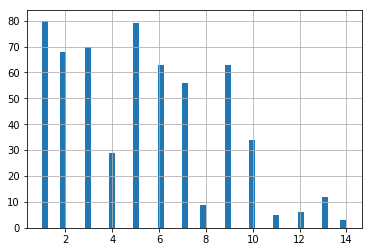

In [40]:
df['winner'].hist(bins=50)


Text(0.5,1,'Probability of match winning by winning toss')

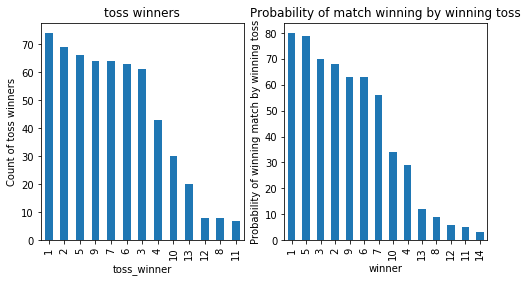

In [42]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Probability of winning match by winning toss')
ax2.set_title("Probability of match winning by winning toss")

In [43]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [44]:
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,7,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,6,1,1,22,9


In [45]:
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, df,predictor_var,outcome_var)

C:\Users\keshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy : 89.601%
